# Exploratory Data analysis of #IndiaWantsOxygen tweets

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indianeedsoxygen-tweets/IndiaWantsOxygen.csv


In [2]:
data = pd.read_csv('../input/indianeedsoxygen-tweets/IndiaWantsOxygen.csv')

In [3]:
data.shape

(25347, 13)

In [4]:
data.sample(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
5037,Arsam Rasul,kasur,Out of context,2011-12-31 11:58:35,74,220,1028,False,2021-04-23 14:07:03,God please protect all humans. We really need ...,"['IndiaNeedsOxygen', 'COVID19']",Twitter for Android,False
18078,Hafiza_S_Maryam_Zaidi,"Karachi, Pakistan",When_Life_changes_To_Be_Harder✌️🖤\nchange_your...,2021-01-16 10:01:33,303,680,544,False,2021-04-24 15:58:00,Pray for India 💔\n#IndiaNeedsOxygen https://t....,['IndiaNeedsOxygen'],Twitter for Android,False
4995,Gargi Jain,India,"|| Company Secretary || \n|| Fashion, Beauty, ...",2013-06-28 15:15:57,230,39,2624,False,2021-04-23 14:13:37,Use this machine instead of searching for oxyg...,"['Tocilizumab', 'Remdisivir', 'Verified', 'COV...",Twitter for Android,False
13366,S. Akbar Hussain,پاکستان,The more man realises his humanity the lonelie...,2013-03-07 04:51:58,311,1254,4107,False,2021-04-22 16:55:05,#IndiaNeedsOxygen #Covid #India \n#Coronavirus...,"['IndiaNeedsOxygen', 'Covid', 'India', 'Corona...",Twitter for Android,False
24600,Fahim Khan Al Mehdi,NaN,Noor🖤,2020-01-14 09:08:01,5,8,411,False,2021-04-24 02:39:15,Supreme Court has become a joke. \n\nSC be li...,['IndiaNeedsOxygen'],Twitter for Android,False
12318,Prof.Munawar Hussain ch,"Lahore, Pakistan",A University Prof. In Information Technologist...,2009-12-19 06:23:45,239,1010,6939,False,2021-04-22 19:49:33,Help India\n#IndiaNeedsOxygen,['IndiaNeedsOxygen'],Twitter for Android,False
9459,ᗩᒪI 🔜(OMAIR HBD ♥️),🇵🇰🇸🇦🇹🇷🇬🇧🇵🇸🇱🇾,OTS|Saudi Pakistani|Mr Lawyer❤|Prefers Humanit...,2012-04-09 11:34:36,2216,3907,18570,False,2021-04-23 03:26:16,This is India but It could be Pakistan if we d...,"['PrayersForIndia', 'IndiaNeedsOxygen']",Twitter for iPhone,False
13181,Mian Omer🇵🇰,NaN,Spare Account 🔥 of ( @iam_mian ) \n#Te...,2020-01-25 11:08:52,23352,14612,46567,False,2021-04-22 17:30:11,"Political differences aside,We must help India...",['IndiaNeedsOxygen'],Twitter for Android,False
2838,Prajwal Bedarkar,Aurangabad ( Maharashtra ),President of CESA \n(Civil Engineering Student...,2020-05-16 15:00:59,40,36,64,False,2021-04-23 18:08:55,Everyone wants a responsible prime minister bu...,"['narendramodi', 'PMOIndia', 'mygovindia', 'pa...",Twitter Web App,False
12618,𝒫𝒾𝓇 𝒩𝒶𝒹𝑒𝑒𝓂 🇵🇰,Mingora Swat KPK Pakistan,Project Engineer,2014-05-08 19:56:39,257,1603,11693,False,2021-04-22 19:03:36,I don’t Know i should mention it here or not ...,['IndiaNeedsOxygen'],Twitter for iPhone,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25347 entries, 0 to 25346
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         25303 non-null  object
 1   user_location     18351 non-null  object
 2   user_description  22556 non-null  object
 3   user_created      25347 non-null  object
 4   user_followers    25347 non-null  int64 
 5   user_friends      25347 non-null  int64 
 6   user_favourites   25347 non-null  int64 
 7   user_verified     25347 non-null  bool  
 8   date              25347 non-null  object
 9   text              25347 non-null  object
 10  hashtags          25303 non-null  object
 11  source            25347 non-null  object
 12  is_retweet        25347 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 2.2+ MB


**Checking null values Counts**

In [6]:
data.isnull().sum()

user_name             44
user_location       6996
user_description    2791
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags              44
source                 0
is_retweet             0
dtype: int64

**Records not having location value**

In [7]:
data[data['user_location'].isnull().values].head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Muhammad Junaid,NaN,‏‏‏راجپوت🔥,2019-10-31 02:02:48,61,92,121,False,2021-04-23 23:59:46,"Political differences aside,We must help India...","['IndiaNeedsOxygen', 'WeCantBreath']",Twitter for Android,False
7,Z⁷,NaN,"At this point in my life as an ARMY, they all ...",2019-11-21 10:39:58,8,59,2971,False,2021-04-23 23:59:08,We pray for the safety of people in India. Sta...,"['PakistanstandswithIndia', 'IndiaNeedsOxygen']",Twitter for Android,False
15,Asif khan,NaN,NaN,2016-11-11 17:24:48,2,59,17,False,2021-04-23 23:58:15,Two neaclear powers!\nOne has no vaccin\nAnd o...,['IndiaNeedsOxygen'],Twitter Web App,False
16,Bilal Kashif,NaN,Life is very beautiful,2021-03-04 18:27:08,110,130,156,False,2021-04-23 23:58:08,"Political differences aside, i hope situation ...","['IndiaNeedsOxygen', 'PakistanstandswithIndia']",Twitter for iPhone,False
17,Ibrahim Rubas,NaN,Study,2019-10-04 10:32:04,0,31,128,False,2021-04-23 23:58:06,To be honest all political differences aside i...,"['PakistanstandswithIndia', 'IndiaNeedsOxygen']",Twitter for Android,False


**Records not having User name values**
These records not usefull because Their account has been withheld

In [8]:
data[data['user_name'].isnull().values].head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
52,NaN,NaN,@hafizmirzaki's account has been withheld in I...,2018-02-22 10:05:53,91,193,3291,False,2021-04-23 23:52:54,@hafizmirzaki's account has been withheld in I...,NaN,Twitter for Android,False
1057,NaN,NaN,@Flyingtastic's account has been withheld in I...,2012-01-23 07:40:43,6091,1258,171396,False,2021-04-23 21:38:23,@Flyingtastic's account has been withheld in I...,NaN,Twitter for Android,False
1113,NaN,NaN,@m4ammar's account has been withheld in India ...,2013-10-30 21:36:15,159,332,2410,False,2021-04-23 21:29:37,@m4ammar's account has been withheld in India ...,NaN,Twitter for Android,False
1744,NaN,NaN,@pak0986's account has been withheld in India ...,2020-09-17 15:09:07,506,515,4322,False,2021-04-23 20:01:59,@pak0986's account has been withheld in India ...,NaN,Twitter for Android,False
2243,NaN,NaN,@SajidAli7771's account has been withheld in I...,2020-04-18 05:11:49,172,628,895,False,2021-04-23 19:14:08,@SajidAli7771's account has been withheld in I...,NaN,Twitter for Android,False


**Drop Records which dont have username field**

In [9]:
null_user_names= data[data['user_name'].isnull()]
print(null_user_names.shape)
print(null_user_names.index)

(44, 13)
Int64Index([   52,  1057,  1113,  1744,  2243,  2480,  2701,  2748,  3903,
             3968,  4140,  5359,  5558,  5907,  6211,  6312,  6618,  6915,
             7200,  7421,  7943,  7961,  7984,  8327,  9085,  9491, 10599,
            10791, 10979, 11327, 11586, 11741, 12087, 12808, 13139, 13581,
            16827, 17533, 18213, 20687, 22246, 22572, 22703, 25053],
           dtype='int64')


In [10]:
data.drop(null_user_names.index,inplace = True)

In [11]:
data.isnull().sum()

user_name              0
user_location       6952
user_description    2791
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags               0
source                 0
is_retweet             0
dtype: int64

**Count of Verified users**

In [12]:
data[data.user_verified == True].user_name.count()

288

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Verified users')

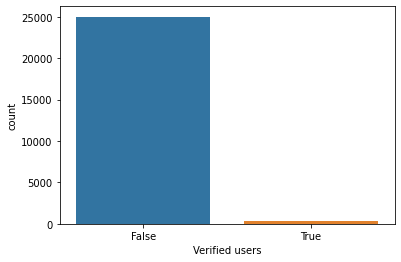

In [13]:
sns.countplot(data['user_verified'])
plt.xlabel('Verified users')

**Change  Datatype of Date column**

In [14]:
data['date'] = pd.to_datetime(data['date'])

In [15]:
data.date.dt.day.value_counts()

23    10343
24     9176
22     4534
21     1248
20        2
Name: date, dtype: int64

**Day wise analysis of count of tweets**

Text(-8.700000000000003, 0.5, 'tweet counts')

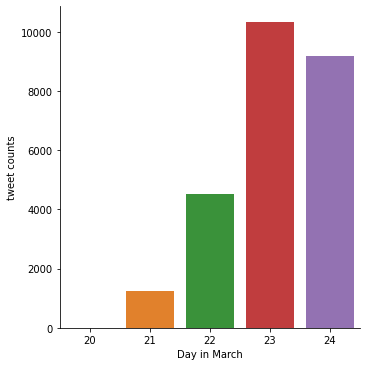

In [16]:
sns.catplot(data = data,  kind="bar",
            x=data.date.dt.day.value_counts().index, 
            y=data.date.dt.day.value_counts().values)
plt.xlabel('Day in March')
plt.ylabel('tweet counts')

**Count of various Sources people used to tweet**

In [17]:
data.source.value_counts().head(10)

Twitter for Android         17418
Twitter for iPhone           4383
Twitter Web App              3265
Twitter for iPad              120
TweetDeck                      46
Hootsuite Inc.                 13
KhuramKTS                      13
Microsoft Power Platform        5
Twitter for Mac                 5
LinkedIn                        4
Name: source, dtype: int64

**Top 10 hashtags used in tweets**

In [18]:
data.hashtags.value_counts().head(10)

['IndiaNeedsOxygen']                               6603
['IndiaNeedsOxygen', 'PakistanstandswithIndia']     777
['IndiaNeedsOxygen', 'IndianLivesMatter']           637
['PakistanstandswithIndia', 'IndiaNeedsOxygen']     542
['CovidIndia', 'IndiaNeedsOxygen']                  258
['indianeedsoxygen']                                236
['IndianLivesMatter', 'IndiaNeedsOxygen']           221
['IndiaNeedsOxygen', 'CovidIndia']                  213
['India', 'IndiaNeedsOxygen']                       182
['IndiaNeedsOxygen', 'IndiaFightsCOVID19']          117
Name: hashtags, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, "['IndiaNeedsOxygen']"),
  Text(1, 0, "['IndiaNeedsOxygen', 'PakistanstandswithIndia']"),
  Text(2, 0, "['IndiaNeedsOxygen', 'IndianLivesMatter']"),
  Text(3, 0, "['PakistanstandswithIndia', 'IndiaNeedsOxygen']"),
  Text(4, 0, "['CovidIndia', 'IndiaNeedsOxygen']")])

<Figure size 720x576 with 0 Axes>

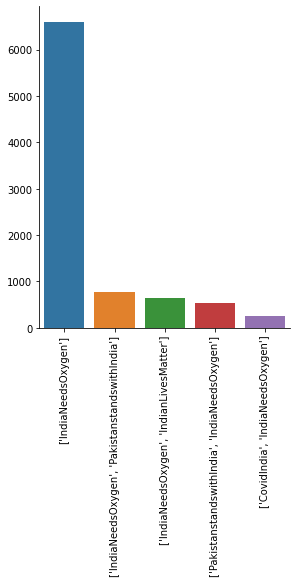

In [19]:
plt.figure(figsize=(10,8))
g = sns.catplot(
    data = data, kind = "bar",
    x = data.hashtags.value_counts().head().index,
    y = data.hashtags.value_counts().head().values)
plt.xticks(rotation = 90)